전처리 중간과정을 진행할 때는 import, 한글깨짐 부분 실행하고 바로 해당 전처리 부분으로 넘어가서 db 가져오면 됨

In [1]:
# 시간 관리 및 데이터 정제
import datetime
import re

# 데이터 관리
import sqlite3
import pandas as pd
import numpy as np

# 텍스트 처리
from konlpy.tag import Hannanum
from nltk import Text
from nltk.tokenize import sent_tokenize, regexp_tokenize

# 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 기타
from collections import Counter
import ast
import pickle

In [2]:
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

# Tokenizing & Get Nouns

## Data Load (cleaned)

In [3]:
conn = sqlite3.connect('../../data/news_cleaned.db')
cur = conn.cursor()

In [4]:
query = cur.execute('SELECT * FROM news')
cols = [column[0] for column in query.description]
news_cleaned = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
news_cleaned.shape

(100000, 7)

In [5]:
cur.close()
conn.close()

## 형태소분석 - 명사 추출

In [5]:
han = Hannanum()

In [6]:
def get_nouns(row, col_name='body'):
    nouns_list = han.nouns(row[col_name])
    if row['id'] % 10000 == 0:
        print('{0} id {1} is processed'.format(datetime.datetime.now(), row['id']))
    return nouns_list

In [9]:
news_cleaned['body_nouns'] = news_cleaned.apply(get_nouns, col_name='body', axis=1)

2020-08-27 23:39:40.032654 id 0 is processed
2020-08-27 23:57:19.599290 id 10000 is processed
2020-08-28 00:14:28.932532 id 20000 is processed
2020-08-28 00:31:53.345109 id 30000 is processed
2020-08-28 00:51:47.546000 id 40000 is processed
2020-08-28 01:11:45.657429 id 50000 is processed
2020-08-28 01:22:49.533267 id 60000 is processed
2020-08-28 01:35:06.314902 id 70000 is processed
2020-08-28 01:47:34.390007 id 80000 is processed
2020-08-28 01:59:49.244506 id 90000 is processed


In [10]:
news_cleaned['summary_nouns'] = news_cleaned.apply(get_nouns, col_name='summary', axis=1)

2020-08-28 02:12:41.542850 id 0 is processed
2020-08-28 02:15:59.426611 id 10000 is processed
2020-08-28 02:19:16.208246 id 20000 is processed
2020-08-28 02:22:38.990867 id 30000 is processed
2020-08-28 02:26:02.996218 id 40000 is processed
2020-08-28 02:29:25.954369 id 50000 is processed
2020-08-28 02:32:28.847219 id 60000 is processed
2020-08-28 02:35:38.092017 id 70000 is processed
2020-08-28 02:38:46.339516 id 80000 is processed
2020-08-28 02:42:00.917081 id 90000 is processed


In [14]:
news_cleaned.to_pickle('../../data/news_nouns.pickle')

summary 부분 다시 실행

In [3]:
news_tokenized = pd.read_pickle('../../data/news_nouns.pickle')

In [8]:
news_tokenized['summary_nouns'] = news_tokenized.apply(get_nouns, col_name='summary', axis=1)

2020-08-31 02:40:29.434352 id 0 is processed
2020-08-31 02:44:45.103518 id 10000 is processed
2020-08-31 02:48:55.614482 id 20000 is processed
2020-08-31 02:53:20.017287 id 30000 is processed
2020-08-31 02:57:38.553787 id 40000 is processed
2020-08-31 03:02:10.436584 id 50000 is processed
2020-08-31 03:06:11.673352 id 60000 is processed
2020-08-31 03:10:53.546880 id 70000 is processed
2020-08-31 03:15:10.360832 id 80000 is processed
2020-08-31 03:19:53.909429 id 90000 is processed


In [81]:
news_tokenized.iloc[7222:7226]

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
7222,7222,넷플릭스 대항마라던 '애플tv+' 한국선 못 본다…또 '홀대 논란',2019.11.05. 오후 1:54,"애플tv+, 100여개 국가서 서비스넷플릭스보다 저렴한 가격이 경쟁력국내선 그림의 ...",애플이 출시한 온라인동영상서비스 애플tv+ 가 서비스 국가에서 한국을 제외해 또 한...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[애플tv+,, 100, 개, 국가, 서비스넷플릭스보다, 저렴한, 가격, 경쟁력국내...","[애플, 출시, 온라인동영상서비스, 애플tv+, 서비스, 국가, 한국, 제외, 번,..."
7223,7223,"세상이 환호하는 타다의 혁신, ‘불법파견’에서 나왔나",2019.11.05. 오후 3:36,타다선 플랫폼노동자라 주장하지만프리랜서 인력공급 업체 자료·증언검찰 공소장 적시 사...,기사 포함 렌터카 실시간 호출서비스 타다 가 10월28일 서울중앙지검에서 무면허 여...,https://news.naver.com/main/ranking/read.nhn?r...,naver,[],"[기사, 포함, 렌터카, 실시간, 호출서비스, 10월28, 서울중앙지검, 무면허, ..."
7224,7224,분화구까지 똑같이…NASA도 탐내는 한국의 '달 실험실',2019.11.05. 오후 2:11,5일 한국건설기술연구원 미래융합관에 설치된 지반열 진공챔버 에서 로버를 테스트하고 ...,25톤 규모의 인공월면토가 쌓여 있는 쏘일카트 위로 주행 테스트 중인 로버의 우측 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,[],"[25톤, 규모, 인공월면토, 쏘일카트, 위, 주행, 테스트, 중, 로버, 우측, ..."
7225,7225,표적항암제 `리보세라닙`…내년 4분기 FDA 허가 기대,2019.11.04. 오후 5:15,진양곤 에이치엘비 회장내년 4월 허가신청서 제출일본으로 기술수출 협의중중동에 합작사...,위암치료제 리보세라닙 임상 3상을 마무리하고 미국 품목허가를 준비 중인 진양곤 에이...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[플랫폼노동자, 주장하지만프리랜서, 인력공급, 업체, 자료·증언검찰, 공소장, 적시...","[위암치료제, 리보세라닙, 임상, 3상, 마무리, 미국, 품목허가, 준비, 중, 진..."


In [83]:
body_nouns = news_tokenized[['body_nouns']].copy()

In [84]:
print(body_nouns.shape)
body_nouns.drop(index=[7223, 7224], inplace=True)
body_nouns.reset_index(inplace=True, drop=True)
print(body_nouns.shape)

(100000, 1)
(99998, 1)


In [90]:
news_tokenized['body_nouns'] = body_nouns

In [116]:
news_tokenized.iloc[13657:13660]

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
13657,13657,[핫클립]포르쉐가 만든 스타워즈 전투기 '페가수스',2019.12.16. 오후 5:14,스타워즈9 개봉관서 공개 152c미터 초정밀 축소 모형슈퍼카 제조사 포르쉐가 이번에...,슈퍼카 제조사 포르쉐가 이번에 영화사 루카스필름과 손잡고 스타워즈에 등장하는 우주 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[스타워즈9, 개봉관, 공개, 152c미터, 초정밀, 축소, 모형슈퍼카, 조사, 포...","[슈퍼카, 조사, 포르쉐, 이번, 영화사, 루카스필름, 스타워즈, 등장, 우주, 비..."
13658,13658,공부 잘하려면 IQ보다 EQ,2019.12.15. 오후 3:21,감성지능 높아야 학교성적도 우수 - 감성지능이 높아야 학교성적도 우수하다는 연구결과...,"공부를 잘하는 데 필요한 것이 무엇일지에 대해 질문을 던지면 높은 지능, 꾸준한 노...",https://news.naver.com/main/ranking/read.nhn?r...,naver,[],"[공부, 데, 필요, 것, 무엇, 지, 질문, 지능, 한, 노력, 인내심, 등, 사..."
13659,13659,타임이 선정한 2010년대 최고의 애플 기기,2019.12.16. 오후 5:47,<타임>지는 12월14일(현지시간) 2010년부터 올해까지 10년 동안 출시된 사람...,<타임>지는 12월14일 2010년부터 올해까지 10년 동안 출시된 사람들의 일상과...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[감성지능, 학교성적, 우수, 감성지능, 학교성적, 우수, 연구결과, 픽사베, 제공...","[타, 지, 12월14, 2010년, 올해, 10년, 동안, 출시, 사람, 일상, ..."


In [117]:
body_nouns = news_tokenized[['body_nouns']].copy()

In [118]:
print(body_nouns.shape)
body_nouns.drop(index=[13658], inplace=True)
body_nouns.reset_index(inplace=True, drop=True)
print(body_nouns.shape)

(100000, 1)
(99999, 1)


In [119]:
body_nouns

,body_nouns
0,"[중증, 폐질환, 유발, 가능성, 미국서, 530건, 의심환자, 발생, 8명, 사망..."
1,"[23일, 제주, 최대, 600밀리미터, 물폭탄, 제17호, 태풍, 타파, 한반도,..."
2,"[비바람, 때문, 행인, 우산, 토요일, 21일, 제17호, 태풍, 타파, 영향, ..."
3,"[김현주, 갱년기(22), 추석연휴, 남편, 딸, 제주도, 나, 일정상, 명절, 당..."
4,"[1905년, 9월20, 고종, 미국, 시어도, 루즈벨트, 대통령의, 딸, 앨리스와..."
...,...
99994,"[마무리, 투수, 붕괴, 결과, 치열, 접전, 두산, 1일, 창원, 파크, 2020..."
99995,"[토트넘, 홋스퍼, 공격진, 보강, 성공, 데, 리, 메일, 2일(한국시간), 토트..."
99996,"[롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 생각, 전준우,..."
99997,NaN


In [120]:
news_tokenized['body_nouns'] = body_nouns

In [137]:
news_tokenized.iloc[69471:69474]

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
69471,69471,"다이나믹 듀오, 故설리 비보에 컴백 일정 연기..""당분간 일정 불참"" [전문]",2019.10.17. 07:55,오는 10월 말 컴백할 계획이었던 그룹 다이나믹 듀오가 설리(25·최진리)의 갑작스...,오는 10월 말 컴백할 계획이었던 그룹 다이나믹 듀오가 설리(25·최진리)의 갑작스...,https://v.daum.net/v/20191017075514285,daum,"[10월, 말, 컴백, 계획, 그룹, 다이나믹, 듀오, 설리(25·최진리), 갑작,...","[10월, 말, 컴백, 계획, 그룹, 다이나믹, 듀오, 설리(25·최진리), 갑작,..."
69472,69472,"'우아한가' 이규한, 15년 전 박혜나 살인사건 진범이었다 '충격 반전'",2019.10.17. 10:50,배우이규한이15년 전 살인 사건의 진범으로 밝혀져 시청자들에게 충격을 안겼다. MB...,배우이규한이15년 전 살인 사건의 진범으로 밝혀져 시청자들에게 충격을 안겼다. MB...,https://v.daum.net/v/20191017105037247,daum,[],"[배우이규한이15년, 전, 살, 사건, 진범, 시청자들, 충격, MBN-드라맥스, ..."
69473,69473,"'골목식당' PD ""초밥집? 이사 어렵고 절박..가격경쟁력 유일한 돌파구""(인터뷰)...",2019.10.17. 10:03,SBS 백종원의 골목식당 을 연출한 정우진 PD가 초밥집의 단일메뉴의 가격과 상황에...,SBS 백종원의 골목식당 을 연출한 정우진 PD가 초밥집의 단일메뉴의 가격과 상황에...,https://v.daum.net/v/20191017100307139,daum,"[배우이규한이15년, 전, 살, 사건, 진범, 시청자들, 충격, MBN-드라맥스, ...","[백종원, 골목식당, 을, 연출, 정우진, 초밥집, 단일메뉴, 가격, 상황, 대해서..."


In [153]:
body_nouns = news_tokenized[['body_nouns']].copy()

In [154]:
print(body_nouns.shape)
body_nouns.drop(index=[69472], inplace=True)
body_nouns.reset_index(inplace=True, drop=True)
print(body_nouns.shape)

(100000, 1)
(99999, 1)


In [155]:
body_nouns = body_nouns[:-3]
body_nouns.shape

(99996, 1)

In [156]:
body_nouns

,body_nouns
0,"[중증, 폐질환, 유발, 가능성, 미국서, 530건, 의심환자, 발생, 8명, 사망..."
1,"[23일, 제주, 최대, 600밀리미터, 물폭탄, 제17호, 태풍, 타파, 한반도,..."
2,"[비바람, 때문, 행인, 우산, 토요일, 21일, 제17호, 태풍, 타파, 영향, ..."
3,"[김현주, 갱년기(22), 추석연휴, 남편, 딸, 제주도, 나, 일정상, 명절, 당..."
4,"[1905년, 9월20, 고종, 미국, 시어도, 루즈벨트, 대통령의, 딸, 앨리스와..."
...,...
99991,"[히어로즈, 시리즈, 스윕, 달성, 2일, 대구, 삼성라이온즈파크, 삼성, 라이온즈..."
99992,"[잉글리시, 프리미어리그(EPL), 승격, 리즈, 유나이티드, 폭풍, 영입, 예고,..."
99993,"[마무리, 투수, 붕괴, 결과, 치열, 접전, 두산, 1일, 창원, 파크, 2020..."
99994,"[토트넘, 홋스퍼, 공격진, 보강, 성공, 데, 리, 메일, 2일(한국시간), 토트..."


In [160]:
body_nouns_plus = news_tokenized.iloc[-4:].apply(get_nouns, col_name='body', axis=1)
body_nouns_plus

99996    [정도, 외국, 에디슨, 러셀(키움, 히어로즈), 복덩, 험난, 7월, 반등, 성공...
99997    [세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ...
99998    [롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거...
99999    [웨, 루니(더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨,...
dtype: object

In [161]:
body_nouns_plus = pd.DataFrame(body_nouns_plus, columns=['body_nouns']).reset_index(drop=True)

In [162]:
body_nouns_plus

,body_nouns
0,"[정도, 외국, 에디슨, 러셀(키움, 히어로즈), 복덩, 험난, 7월, 반등, 성공..."
1,"[세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ..."
2,"[롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거..."
3,"[웨, 루니(더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨,..."


In [163]:
body_nouns = pd.concat([body_nouns, body_nouns_plus], ignore_index=True)
body_nouns

,body_nouns
0,"[중증, 폐질환, 유발, 가능성, 미국서, 530건, 의심환자, 발생, 8명, 사망..."
1,"[23일, 제주, 최대, 600밀리미터, 물폭탄, 제17호, 태풍, 타파, 한반도,..."
2,"[비바람, 때문, 행인, 우산, 토요일, 21일, 제17호, 태풍, 타파, 영향, ..."
3,"[김현주, 갱년기(22), 추석연휴, 남편, 딸, 제주도, 나, 일정상, 명절, 당..."
4,"[1905년, 9월20, 고종, 미국, 시어도, 루즈벨트, 대통령의, 딸, 앨리스와..."
...,...
99995,"[롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 생각, 전준우,..."
99996,"[정도, 외국, 에디슨, 러셀(키움, 히어로즈), 복덩, 험난, 7월, 반등, 성공..."
99997,"[세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ..."
99998,"[롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거..."


In [165]:
news_tokenized['body_nouns'] = body_nouns

In [167]:
news_tokenized.tail(3)

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
99997,99997,"STL, 코로나19 확진 4명 추가..선수 총 3명",2020.08.02. 01:16,"세인트루이스 카디널스 구단에 코로나19 확진자가 추가로 발생,총 6명으로 늘어났다....","세인트루이스 카디널스 구단에 코로나19 확진자가 추가로 발생,총 6명으로 늘어났다....",https://v.daum.net/v/20200802011623768,daum,"[세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ...","[세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ..."
99998,99998,"[사직 게임노트]'노경은 완벽투' 롯데, KIA 8-0 꺾고 '8월 2연승' 신바람",2020.08.02. 19:49,롯데 자이언츠가 8월 첫 주말을 연승으로 장식했다. 롯데는 2일 사직구장에서 열린 ...,롯데 자이언츠가 8월 첫 주말을 연승으로 장식했다. 롯데는 2일 사직구장에서 열린 ...,https://v.daum.net/v/20200802194902874,daum,"[롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거...","[롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거..."
99999,99999,"루니의 퍼거슨 비판..""UCL 결승전 당시 전술은 잘못되었어""",2020.08.02. 21:33,웨인 루니(더비 카운티)가 과거 맨체스터 유나이티드에서 뛰던 시절 알렉스 퍼거슨 감...,웨인 루니(더비 카운티)가 과거 맨체스터 유나이티드에서 뛰던 시절 알렉스 퍼거슨 감...,https://v.daum.net/v/20200802213338082,daum,"[웨, 루니(더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨,...","[웨, 루니(더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨,..."


## pickle로 저장 (tokenized)
- 리스트 데이터가 string으로 변환되는 상황을 방지하고자 pickle로 저장함

In [168]:
news_tokenized.to_pickle('../../data/news_nouns.pickle')

# Normalization

## Data Load (tokenized)

In [3]:
news_tokenized = pd.read_pickle('../../data/news_nouns.pickle')
news_tokenized.shape

(100000, 9)

In [4]:
news_tokenized.head(3)

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
0,0,"액상담배 美흡연자 8명 숨졌다, 복지부 ""한국 판매 금지 검토""",2019.09.20. 오후 6:38,"중증 폐질환 유발 가능성 있다 미국서 530건 의심환자 발생, 8명 사망국내 상황 ...",정부가 액상형 전자담배 사용 자제를 권고하고 나섰다.복지부는 미국 사례를 참조해 액...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[중증, 폐질환, 유발, 가능성, 미국서, 530건, 의심환자, 발생, 8명, 사망...","[정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액..."
1,1,세력 키우는 태풍 '타파'…22일 밤 부산 앞바다 통과,2019.09.20. 오후 5:19,23일까지 강하고 많은 비제주에 최대 600밀리미터 물폭탄 제17호 태풍 타파가 한...,제17호 태풍 타파 가 한반도에 접근할수록 점점 강해지고 있는 데다 부산 앞바다를 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[23일, 제주, 최대, 600밀리미터, 물폭탄, 제17호, 태풍, 타파, 한반도,...","[제17호, 태풍, 타파, 한반도, 접근, 데, 부산, 앞바다, 전망, 예상, 중심..."
2,2,[내일날씨] 태풍 '타파' 북상…전국에 강한 비바람,2019.09.20. 오전 9:00,강한 비바람 때문에 행인이 우산을 꽉 붙잡고 지나가고 있다. 토요일인 21일 제17...,토요일인 21일 제17호 태풍 타파 영향으로 전국이 흐리고 비가 내리겠다.기상청은 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[비바람, 때문, 행인, 우산, 토요일, 21일, 제17호, 태풍, 타파, 영향, ...","[토요일, 21일, 제17호, 태풍, 타파, 영향, 전국, 비, 기상청, 제주도, ..."


In [5]:
print(type(news_tokenized.loc[0, 'summary_nouns']))
news_tokenized.loc[0, 'summary_nouns'][:10]

<class 'list'>


['정부', '액상형', '전자담배', '사용', '자제', '권고', '복지부', '미국', '사례', '참조']

##  (, ) 제거

In [6]:
def remove_parentheses(nouns_list):
    new_list = []
    for _ in nouns_list:
        new_list += re.split(r'[\(\)]', _)
    return [x for x in new_list if x != '']

In [7]:
news_tokenized['body_nouns'] = news_tokenized['body_nouns'].apply(remove_parentheses)

In [8]:
news_tokenized['summary_nouns'] = news_tokenized['summary_nouns'].apply(remove_parentheses)

## 숫자 제거

In [9]:
def remove_nums(nouns_list):
    '''명사 리스트 데이터를 받아 숫자를 제거하는 함수'''
    new_list = [re.sub(r'[0-9]+', '', x) for x in nouns_list]
    return [x for x in new_list if x != '']

In [10]:
news_tokenized.summary_nouns

0        [정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액...
1        [제17호, 태풍, 타파, 한반도, 접근, 데, 부산, 앞바다, 전망, 예상, 중심...
2        [토요일, 21일, 제17호, 태풍, 타파, 영향, 전국, 비, 기상청, 제주도, ...
3        [추석, 연휴, 시작, 전, 남편, 아이, 주도행, 비행기, 제작, 일정상, 명절,...
4        [1905년, 9월20, 고종, 황제, 국빈자격, 대한제국, 방문, 앨리스, 루즈벨...
                               ...                        
99995    [롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 생각, 2, 3...
99996    [정도, 외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 5월, 테일러, 모터, 방...
99997    [세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ...
99998    [롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거...
99999    [웨, 루니, 더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨...
Name: summary_nouns, Length: 100000, dtype: object

In [11]:
remove_nums(news_tokenized.loc[2, 'summary_nouns'])[:10]

['토요일', '일', '제호', '태풍', '타파', '영향', '전국', '비', '기상청', '제주도']

In [12]:
news_tokenized['body_nouns'] = news_tokenized['body_nouns'].apply(remove_nums)

In [13]:
news_tokenized['summary_nouns'] = news_tokenized['summary_nouns'].apply(remove_nums)

In [14]:
news_tokenized.summary_nouns

0        [정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액...
1        [제호, 태풍, 타파, 한반도, 접근, 데, 부산, 앞바다, 전망, 예상, 중심, ...
2        [토요일, 일, 제호, 태풍, 타파, 영향, 전국, 비, 기상청, 제주도, 동해안,...
3        [추석, 연휴, 시작, 전, 남편, 아이, 주도행, 비행기, 제작, 일정상, 명절,...
4        [년, 월, 고종, 황제, 국빈자격, 대한제국, 방문, 앨리스, 루즈벨트, 덕수궁,...
                               ...                        
99995    [롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 생각, 루, 사...
99996    [정도, 외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 월, 테일러, 모터, 방출...
99997    [세인트루이스, 카디널스, 구단, 코로나, 확진자, 추가, 발생, 총, 명, 일, ...
99998    [롯데, 자이언츠, 월, 첫, 주말, 연승, 장식, 롯데, 사직구장, 타이거즈전, ...
99999    [웨, 루니, 더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨...
Name: summary_nouns, Length: 100000, dtype: object

## 불용어 처리

Zipf's Law

In [15]:
body_nouns = []
for _ in news_tokenized['body_nouns']:
    body_nouns += _

In [16]:
summary_nouns = []
for _ in news_tokenized['summary_nouns']:
    summary_nouns += _

In [17]:
vocabs_body = Text(body_nouns).vocab()

In [18]:
vocabs_summary = Text(summary_nouns).vocab()

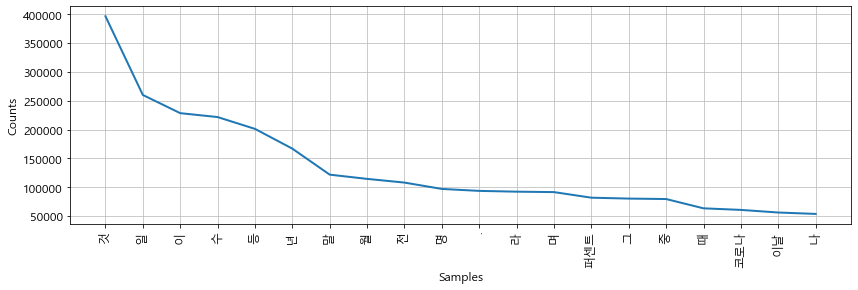

In [19]:
vocabs_body.plot(20)

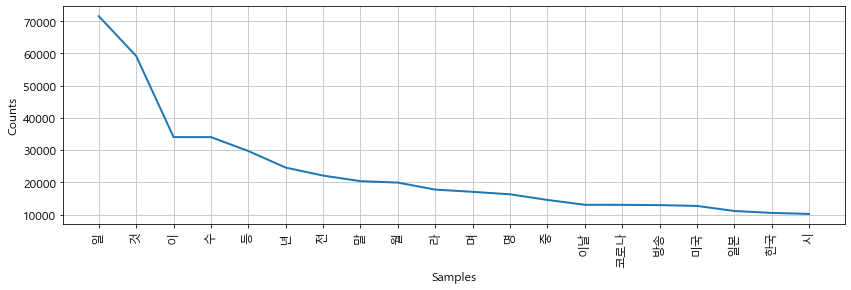

In [20]:
vocabs_summary.plot(20)

In [21]:
stopwords_list1 = []
for _ in vocabs_body.most_common(17):
    stopwords_list1.append(_[0])
for _ in vocabs_summary.most_common(13):
    stopwords_list1.append(_[0])

In [22]:
stopwords2 = pd.read_csv('../stopwords/stopwords_concat.csv')
stopwords_list2 = list(stopwords2['stopwords'].values)
len(stopwords_list2)

775

In [23]:
stopwords_list = stopwords_list1 + stopwords_list2
print(len(stopwords_list))
stopwords_list = list(set(stopwords_list))
print(len(stopwords_list))

805
668


In [24]:
def remove_stopwords(nouns_list, stopwords_list):
    '''명사 리스트 데이터를 받아 불용어를 처리하는 함수'''
    new_list = [x for x in nouns_list if x not in stopwords_list]
    return new_list

In [25]:
news_tokenized['body_nouns'] = news_tokenized['body_nouns'].apply(remove_stopwords, stopwords_list=stopwords_list)

In [26]:
news_tokenized['summary_nouns'] = news_tokenized['summary_nouns'].apply(remove_stopwords, stopwords_list=stopwords_list)

In [27]:
news_tokenized['summary_nouns']

0        [정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액...
1        [제호, 태풍, 타파, 한반도, 접근, 부산, 앞바다, 전망, 예상, 중심, 기압,...
2        [토요일, 제호, 태풍, 타파, 영향, 전국, 비, 기상청, 제주도, 동해안, 남해...
3        [추석, 연휴, 시작, 남편, 주도행, 비행기, 제작, 일정상, 명절, 당일, 아버...
4        [고종, 황제, 국빈자격, 대한제국, 방문, 앨리스, 루즈벨트, 덕수궁, 중명전, ...
                               ...                        
99995    [롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 루, 사이, 전...
99996    [외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 테일러, 모터, 방출, 이후, 달...
99997    [세인트루이스, 카디널스, 구단, 코로나, 확진자, 추가, 발생, 총, 세인트루이스...
99998    [롯데, 자이언츠, 첫, 주말, 연승, 장식, 롯데, 사직구장, 타이거즈전, 이닝,...
99999    [웨, 루니, 더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨...
Name: summary_nouns, Length: 100000, dtype: object

## pickle로 저장 (normalized)

In [28]:
news_tokenized.to_pickle('../../data/news_normalized_final.pickle')

In [29]:
news_tokenized

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
0,0,"액상담배 美흡연자 8명 숨졌다, 복지부 ""한국 판매 금지 검토""",2019.09.20. 오후 6:38,"중증 폐질환 유발 가능성 있다 미국서 530건 의심환자 발생, 8명 사망국내 상황 ...",정부가 액상형 전자담배 사용 자제를 권고하고 나섰다.복지부는 미국 사례를 참조해 액...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[중증, 폐질환, 유발, 가능성, 미국서, 건, 의심환자, 발생, 사망국내, 상황,...","[정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액..."
1,1,세력 키우는 태풍 '타파'…22일 밤 부산 앞바다 통과,2019.09.20. 오후 5:19,23일까지 강하고 많은 비제주에 최대 600밀리미터 물폭탄 제17호 태풍 타파가 한...,제17호 태풍 타파 가 한반도에 접근할수록 점점 강해지고 있는 데다 부산 앞바다를 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[제주, 최대, 밀리미터, 물폭탄, 제호, 태풍, 타파, 한반도, 접근, 부산, 앞...","[제호, 태풍, 타파, 한반도, 접근, 부산, 앞바다, 전망, 예상, 중심, 기압,..."
2,2,[내일날씨] 태풍 '타파' 북상…전국에 강한 비바람,2019.09.20. 오전 9:00,강한 비바람 때문에 행인이 우산을 꽉 붙잡고 지나가고 있다. 토요일인 21일 제17...,토요일인 21일 제17호 태풍 타파 영향으로 전국이 흐리고 비가 내리겠다.기상청은 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[비바람, 행인, 우산, 토요일, 제호, 태풍, 타파, 영향, 전국, 비, 예상, ...","[토요일, 제호, 태풍, 타파, 영향, 전국, 비, 기상청, 제주도, 동해안, 남해..."
3,3,30년 만에…친정에서 차례 지낸 며느리의 특별한 추석,2019.09.19. 오후 3:01,김현주의 즐거운 갱년기(22) 추석연휴를 맞아 남편과 딸은 제주도로 향했다. 나는 ...,"추석 연휴가 시작되기 전 남편과 딸 아이는 제주도행 비행기를 탔고, 잡지 제작 일정...",https://news.naver.com/main/ranking/read.nhn?r...,naver,"[김현주, 갱년기, 추석연휴, 남편, 딸, 제주도, 일정상, 명절, 당일, 어머니,...","[추석, 연휴, 시작, 남편, 주도행, 비행기, 제작, 일정상, 명절, 당일, 아버..."
4,4,미국 '앨리스 공주'에게 베푼 고종의 오찬…황제의 식탁에 서린 슬픈 역사,2019.09.20. 오후 1:20,1905년 9월20일 고종이 미국 시어도어 루즈벨트 대통령의 딸인 앨리스와의 공식오...,1905년 9월20일 고종 황제는 국빈자격으로 대한제국을 방문한 앨리스 루즈벨트를 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[고종, 미국, 시어도, 루즈벨트, 대통령의, 딸, 앨리스와, 공식오찬, 마련, 음...","[고종, 황제, 국빈자격, 대한제국, 방문, 앨리스, 루즈벨트, 덕수궁, 중명전, ..."
...,...,...,...,...,...,...,...,...,...
99995,99995,"[부산 프리토크]롯데 허문회 감독 ""전준우 주루 미스라 생각, 마음가짐 좋았다""",2020.08.02. 14:51,롯데 자이언츠 허문회 감독은 전준우의 재치 있는 주루 플레이에 대한 생각을 밝혔다....,롯데 자이언츠 허문회 감독은 전준우의 재치 있는 주루 플레이에 대한 생각을 밝혔다....,https://v.daum.net/v/20200802145136484,daum,"[롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 전준우, 부산,...","[롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 루, 사이, 전..."
99996,99996,"[SC핫피플] 매일 타점 생산하는 러셀, 그가 오자 키움이 살아났다",2020.08.02. 09:28,이 정도면 새 외국인 타자 에디슨 러셀(키움 히어로즈)은 복덩이다. 험난한 7월을 ...,이 정도면 새 외국인 타자 에디슨 러셀(키움 히어로즈)은 복덩이다. 키움은 5월 말...,https://v.daum.net/v/20200802092856893,daum,"[외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 험난, 반등, 성공, 타격, 마운...","[외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 테일러, 모터, 방출, 이후, 달..."
99997,99997,"STL, 코로나19 확진 4명 추가..선수 총 3명",2020.08.02. 01:16,"세인트루이스 카디널스 구단에 코로나19 확진자가 추가로 발생,총 6명으로 늘어났다....","세인트루이스 카디널스 구단에 코로나19 확진자가 추가로 발생,총 6명으로 늘어났다....",https://v.daum.net/v/20200802011623768,daum,"[세인트루이스, 카디널스, 구단, 코로나, 확진자, 추가, 발생, 총, 미국, 매체...","[세인트루이스, 카디널스, 구단, 코로나, 확진자, 추가, 발생, 총, 세인트루이스..."
99998,99998,"[사직 게임노트]'노경은 완벽투' 롯데, KIA 8-0 꺾고 '8월 2연승' 신바람",2020.08.02. 19:49,롯데 자이언츠가 8월 첫 주말을 연승으로 장식했다. 롯데는 2일 사직구장에서 열린 ...,롯데 자이언츠가 8월 첫 주말을 연승으로 장식했다. 롯데는 2일 사직구장에서 열린 ...,https://v.daum.net/v/20200802194902874,daum,"[롯데, 자이언츠, 첫, 주말, 연승, 장식, 롯데, 사직구장, 타이거즈전, 이닝,...","[롯데, 자이언츠, 첫, 주말, 연승, 장식, 롯데, 사직구장, 타이거즈전, 이닝,..."
